# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge, HuberRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

### Importando dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
model = test['NU_INSCRICAO']

# Analisando os dados

In [3]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


### Verificando a distribuição do target e presença de outlier

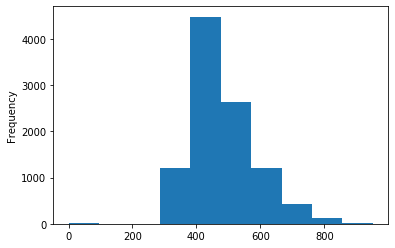

In [5]:
train['NU_NOTA_MT'].plot(kind='hist')

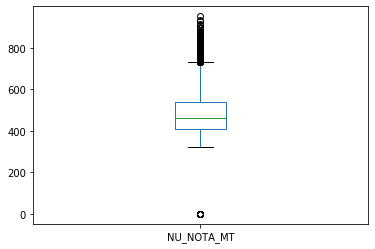

In [6]:
train['NU_NOTA_MT'].plot(kind='box')

In [7]:
NU_NOTA_MT = train['NU_NOTA_MT']
q3 = NU_NOTA_MT.quantile(0.75)
print(f"{100-(len(train['NU_NOTA_MT'][train['NU_NOTA_MT'] <= q3]))/len(train)*100}% da base é outlier")

44.646758922068464% da base é outlier


### Verificando valores nulos

In [36]:
pd.DataFrame([train[test.columns].isna().sum(), train[test.columns].isna().sum()/len(train)*100]).T

,0,1
NU_INSCRICAO,0.0,0.000000
CO_UF_RESIDENCIA,0.0,0.000000
SG_UF_RESIDENCIA,0.0,0.000000
NU_IDADE,0.0,0.000000
TP_SEXO,0.0,0.000000
TP_COR_RACA,0.0,0.000000
TP_NACIONALIDADE,0.0,0.000000
TP_ST_CONCLUSAO,0.0,0.000000
TP_ANO_CONCLUIU,0.0,0.000000
TP_ESCOLA,0.0,0.000000


#### Verificando as colunas que possuem dados nulos
- Há linhas que praticamente são nulas por inteiro, e acredito que preencher esses dados irá causar um grande viés, então vou inicialmente começar com um modelo bem simples, com o menor número de features

In [9]:
train.loc[:, (train.isna().sum() > 0)]

,TP_ESTADO_CIVIL,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ENSINO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q041
0,0.0,4314902.0,Porto Alegre,43.0,RS,NaN,NaN,NaN,NaN,NaN,...,80.0,520.0,H,E,5.0,5.0,1.0,0.0,0.0,5.0
1,0.0,2304707.0,Granja,23.0,CE,1.0,23005157.0,2304707.0,Granja,23.0,...,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2304400.0,Fortaleza,23.0,CE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3304557.0,Rio de Janeiro,33.0,RJ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F,C,2.0,0.0,5.0,5.0,5.0,5.0
4,0.0,1505304.0,Oriximiná,15.0,PA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,F,D,5.0,4.0,3.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0.0,3552205.0,Sorocaba,35.0,SP,NaN,NaN,NaN,NaN,NaN,...,40.0,440.0,C,A,5.0,5.0,5.0,5.0,5.0,NaN
13726,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,560.0,I,A,4.0,4.0,5.0,5.0,4.0,NaN
13727,0.0,4303202.0,Cacique Doble,43.0,RS,NaN,NaN,NaN,NaN,NaN,...,120.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13728,1.0,3304557.0,Rio de Janeiro,33.0,RJ,NaN,NaN,NaN,NaN,NaN,...,100.0,460.0,E,E,5.0,5.0,5.0,5.0,5.0,5.0


### Simplificando a análise para apenas as colunas de notas

In [10]:
train_features = ['NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  'NU_NOTA_COMP1',
                  'NU_NOTA_COMP2',
                  'NU_NOTA_COMP3', 
                  'NU_NOTA_COMP4',
                  'NU_NOTA_COMP5',
                  'NU_NOTA_REDACAO',
                  'NU_NOTA_MT'] 

test_features = ['NU_NOTA_CN',
                 'NU_NOTA_CH',
                 'NU_NOTA_LC',
                 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1',
                 'NU_NOTA_COMP2',
                 'NU_NOTA_COMP3',
                 'NU_NOTA_COMP4',
                 'NU_NOTA_COMP5']

features_both = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']

In [11]:
train[train_features].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,473.495155,529.661087,516.472841,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,71.093674,73.726344,68.688190,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,459.800000,532.000000,520.900000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,514.500000,581.200000,564.900000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,806.400000,807.000000,763.600000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


In [12]:
train[test_features].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,473.495155,529.661087,516.472841,529.048258,119.811704,111.915918,106.824238,113.123951,77.372446
std,71.093674,73.726344,68.688190,154.294758,29.846017,33.737588,34.341349,33.480033,43.067140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,440.000000,120.000000,100.000000,80.000000,100.000000,40.000000
50%,459.800000,532.000000,520.900000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000
75%,514.500000,581.200000,564.900000,600.000000,140.000000,120.000000,120.000000,120.000000,100.000000
max,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


#### Verificando o mapa de calor
- A nota de redação é baseada nas notas obtidas de cada "componente". E a correlação com as outras notas não tem uma relação forte com essas componentes. Talvez caiba remove-las para simplificar mais o modelo e evitar viés.

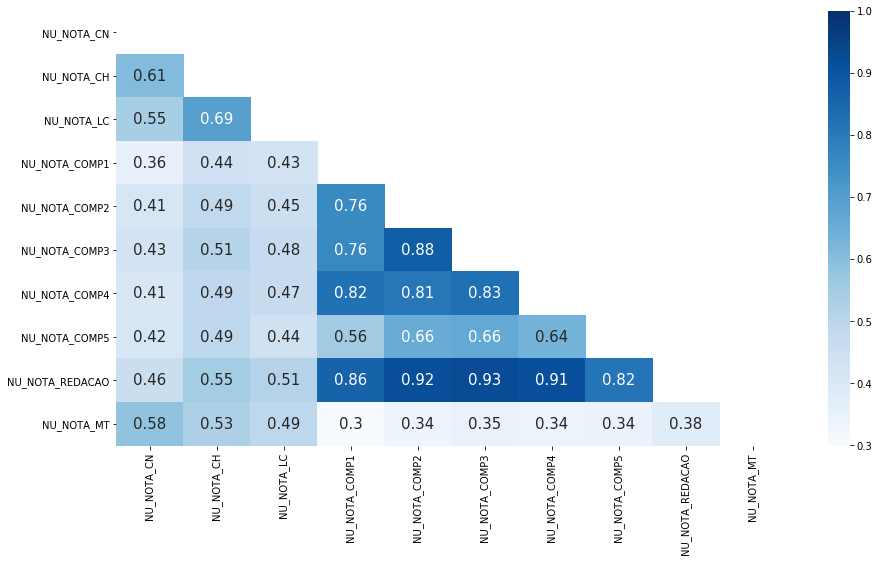

In [13]:
corr = train[train_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15, 8))
sns.heatmap(corr, annot = True, annot_kws = {"size": 15}, cmap= 'Blues', mask=mask)

# Tratando os dados
- Há mais colunas na base de treino que na de teste
- Há presença de valores nulos
- Criar um modelo simples, com o menor número de features

### Selecionando as colunas para o modelo

In [14]:
train_features = ['NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  #'NU_NOTA_COMP1',
                  #'NU_NOTA_COMP2',
                  #'NU_NOTA_COMP3', 
                  #'NU_NOTA_COMP4',
                  #'NU_NOTA_COMP5',
                  'NU_NOTA_REDACAO',
                  'NU_NOTA_MT'] 

test_features = ['NU_NOTA_CN',
                  'NU_NOTA_CH',
                  'NU_NOTA_LC',
                  'NU_NOTA_REDACAO']

### Preenchendo valores nulos

In [15]:
train[train_features] = train[train_features].fillna(value=0)
test[test_features] = test[test_features].fillna(value=0)

In [16]:
train[train_features].isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_MT         0
dtype: int64

In [17]:
test[test_features].isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

### Criando novas features

In [18]:
train['SUM'] = train[test_features].sum(axis=1)
train['STD'] = train[test_features].std(axis=1)
train['MEAN'] = train[test_features].mean(axis=1)
train['MIN'] = train[test_features].min(axis=1)
train['MAX'] = train[test_features].max(axis=1)

test['SUM'] = test[test_features].sum(axis=1)
test['STD'] = test[test_features].std(axis=1)
test['MEAN'] = test[test_features].mean(axis=1)
test['MIN'] = test[test_features].min(axis=1)
test['MAX'] = test[test_features].max(axis=1)

In [19]:
new_feat = ['SUM','STD','MEAN','MIN','MAX']
train_features.extend(new_feat)
test_features.extend(new_feat)

In [38]:
train[train_features].sample(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,SUM,STD,MEAN,MIN,MAX
9726,443.7,377.8,452.2,160.0,372.9,1433.7,136.398250,358.425,160.0,452.2
461,490.0,611.0,615.7,720.0,531.6,2436.7,94.040359,609.175,490.0,720.0
12488,494.7,496.9,563.0,520.0,402.6,2074.6,31.703890,518.650,494.7,563.0
12473,431.3,530.0,504.2,520.0,362.7,1985.5,44.664555,496.375,431.3,530.0
2189,404.2,492.1,438.4,380.0,348.0,1714.7,48.598997,428.675,380.0,492.1


In [39]:
test[test_features].sample(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,SUM,STD,MEAN,MIN,MAX
576,490.8,587.8,563.0,640.0,2281.6,62.015697,570.400,490.8,640.0
1163,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0
1563,446.2,532.8,555.5,320.0,1854.5,106.705151,463.625,320.0,555.5
1348,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0


## Iniciando o modelo

In [22]:
X_train = train[test_features]
X_test = test[test_features]
y = train['NU_NOTA_MT']

### Vou utilizar 3 algoritmos:
- <b>LinearRegression</b>: Para base-line
- <b>HuberRegressor</b>: Um modelo mais robusto para outliers
- <b>BayesianRidge</b>: Modelo baysiano que estima baseado em probabilidade, provavelmente não terá bons resultados sozinho, mas penso em mesclar com o LinearRegression
- Pensei em utilizar o SVR, mas é um modelo muito pesado e não se dará bem com os outliers, que tem uma boa composição na base (45%)

In [23]:
models = {
    'LinearRegression': LinearRegression(normalize=True),
    'HuberRegressor': HuberRegressor(max_iter=150, fit_intercept=True, alpha=0.0001, epsilon=1.35),
    'BayesianRidge': BayesianRidge()
}

In [24]:
pred = {}
for name, model in models.items():
    model.fit(X_train, y)
    pred[name] = model.predict(X_test)
    print(f"{name} --> {model.score(X_train, y)}")

LinearRegression --> 0.9041560906579568
HuberRegressor --> 0.9022199307210013
BayesianRidge --> 0.904153881723405


In [25]:
pd.DataFrame(data=pred).describe()

,LinearRegression,HuberRegressor,BayesianRidge
count,4576.000000,4576.000000,4576.000000
mean,354.735582,349.387600,354.735784
std,216.811007,214.810994,216.793512
min,-1.418334,-0.554556,-1.446508
25%,56.595468,22.746598,57.577481
50%,448.870608,442.670058,448.917520
75%,502.077730,495.419323,501.997891
max,713.191313,704.605325,712.958445


In [26]:
pred = np.clip(pred['HuberRegressor'], 0., 1000.)
pd.DataFrame(data=pred).describe()

,0
count,4576.000000
mean,349.523210
std,214.590048
min,0.000000
25%,22.746598
50%,442.670058
75%,495.419323
max,704.605325


In [27]:
result = pd.DataFrame([model, np.around(pred, 2)], index=['NU_INSCRICAO', 'NU_NOTA_MT']).T
result.to_csv('answer.csv', index = False, header = True)

> <b>SCORE SUBMISSÃO CODENATION</b>
- LinearRegression: 92.72%
- HuberRegressor: 100%
- BayesianRidge: 100%